<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment

## TASK 1

### Boxplot for the 'Median value of owner-occupied homes' (MEDV)

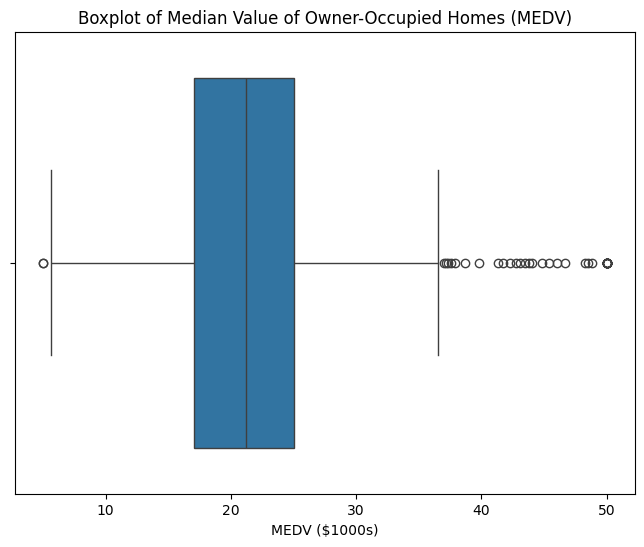

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('MEDV ($1000s)')
plt.show()

Most of the homes have a median value between 15,000 and 25,000, but there are a few homes with significantly higher values between 35000 and 50000.

## Bar plot for the 'Charles River' (CHAS) variable

<ipython-input-11-d5a67450583a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=boston_df['CHAS'], palette='Set2', hue=None)


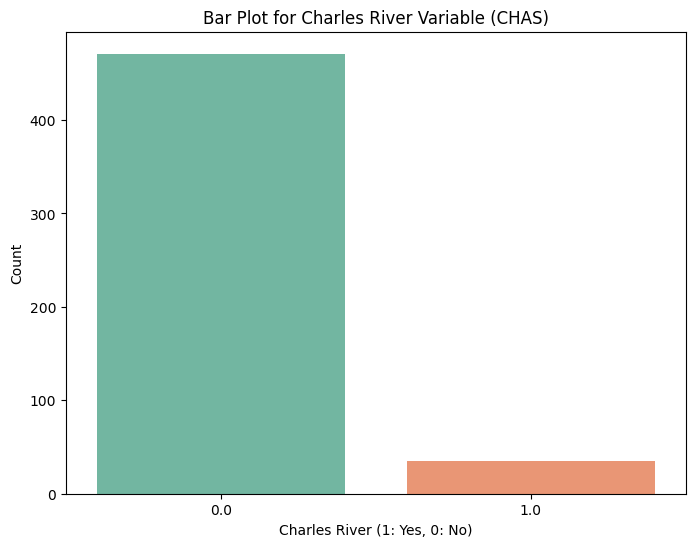

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'], palette='Set2'hue=None)
plt.title('Bar Plot for Charles River Variable (CHAS)')
plt.xlabel('Charles River (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

A vast majority of the homes do not bound the Charles River.

## Boxplot for 'MEDV' vs. 'AGE' (discretizing AGE into three groups)

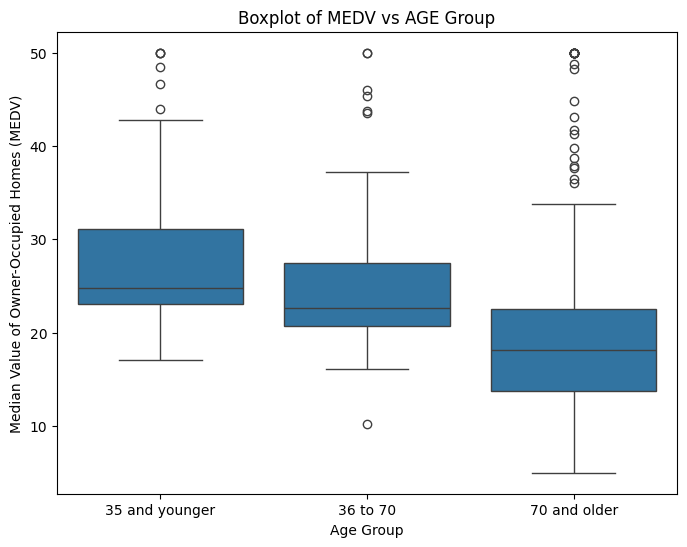

In [14]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and younger', '36 to 70', '70 and older'])

plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['AGE_GROUP'], y=boston_df['MEDV'])
plt.title('Boxplot of MEDV vs AGE Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.show()

There is a clear variation between the age groups particularly 70 an older but the presence of outliers may require futher analysis

# Scatter plot for 'NOX' (Nitric Oxide Concentrations) vs. 'INDUS' (Proportion of Non-Retail Business Acres)

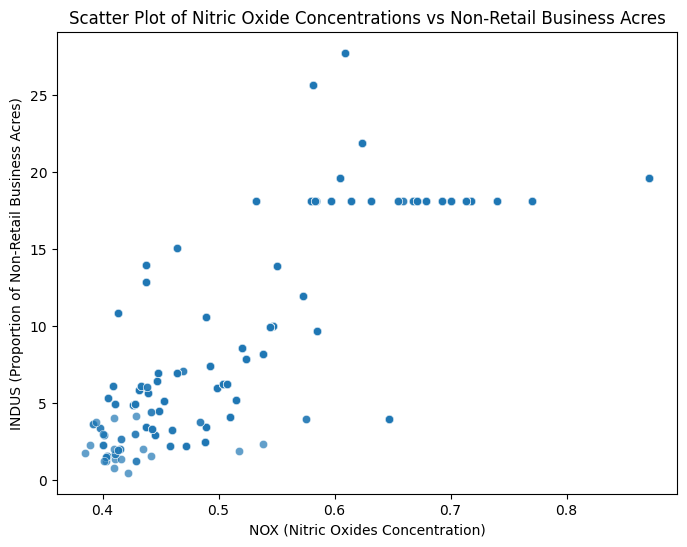

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'], alpha=0.7)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Non-Retail Business Acres')
plt.xlabel('NOX (Nitric Oxides Concentration)')
plt.ylabel('INDUS (Proportion of Non-Retail Business Acres)')
plt.show()

There is a linear relation between The NOX and the INDUS.

# Histogram for the 'PTRATIO' (Pupil-Teacher Ratio) variable

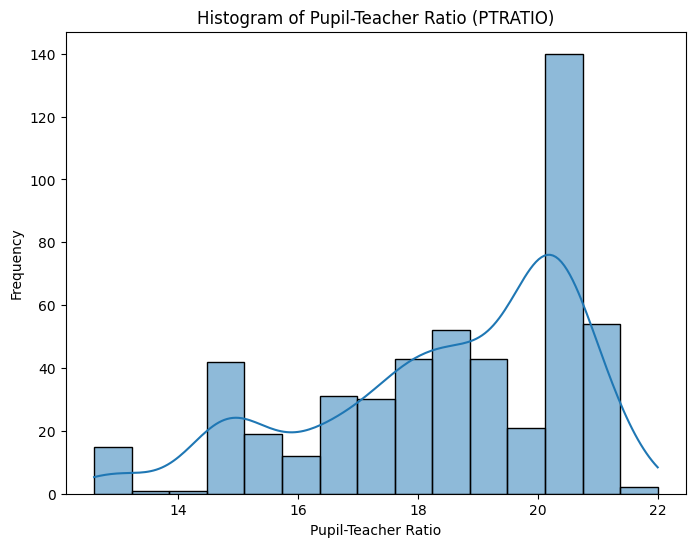

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


## Task 3

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [17]:
from scipy.stats import ttest_ind

group_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = ttest_ind(group_1, group_0)

alpha = 0.05
if p_value < alpha:
    print(f"Reject H₀: There is a significant difference in the median value of homes (p = {p_value:.4f})")
else:
    print(f"Fail to reject H₀: There is no significant difference in the median value of homes (p = {p_value:.4f})")

Reject H₀: There is a significant difference in the median value of homes (p = 0.0001)


Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [21]:
from scipy.stats import f_oneway
age_groups = ['35 and younger', '36 to 70', '70 and older']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=age_groups)

group_1 = boston_df[boston_df['AGE_GROUP'] == age_groups[0]]['MEDV']
group_2 = boston_df[boston_df['AGE_GROUP'] == age_groups[1]]['MEDV']
group_3 = boston_df[boston_df['AGE_GROUP'] == age_groups[2]]['MEDV']

f_stat, p_value = f_oneway(group_1, group_2, group_3)

alpha = 0.05
if p_value < alpha:
    print(f"Reject H₀: There is a significant difference in the median values of homes (p = {p_value:.4f})")
else:
    print(f"Fail to reject H₀: There is no significant difference in the median values of homes (p = {p_value:.4f})")

Reject H₀: There is a significant difference in the median values of homes (p = 0.0000)


Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [19]:
from scipy.stats import pearsonr

# Perform Pearson correlation
corr_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# State the conclusion
alpha = 0.05
if p_value < alpha:
    print(f"Reject H₀: There is a significant relationship between NOX and INDUS (p = {p_value:.4f}), correlation coefficient = {corr_coefficient:.4f}")
else:
    print(f"Fail to reject H₀: There is no significant relationship between NOX and INDUS (p = {p_value:.4f}), correlation coefficient = {corr_coefficient:.4f}")

Reject H₀: There is a significant relationship between NOX and INDUS (p = 0.0000), correlation coefficient = 0.7637


What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [20]:
import statsmodels.api as sm

# Independent variable (DIS), dependent variable (MEDV)
X = boston_df[['DIS']]  # Predictor (weighted distance to employment centers)
X = sm.add_constant(X)  # Add a constant for the intercept
y = boston_df['MEDV']  # Response variable

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        20:52:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

The results suggest that the weighted distance to the five employment centres is positively related to the median value of homes, but the low R^2 shows that the model is not taking into accoint all the factors that affect the values of the homes.